In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("root")

In [2]:
m_true = 2.5
c_true = -1.0

In [6]:
x_vals = np.linspace(0, 10, 10)
noise = np.random.normal(0, 0.5, size=len(x_vals))
y_vals = m_true * x_vals + c_true + noise

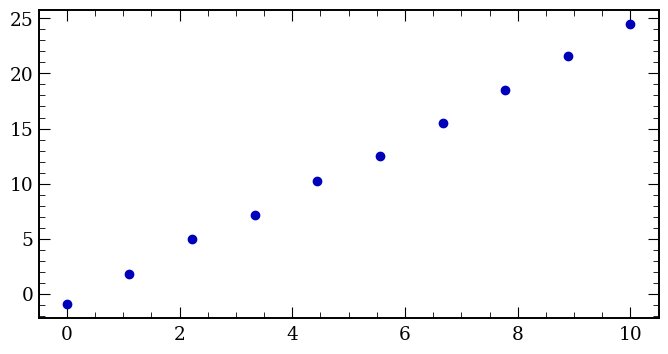

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, marker="o", linestyle="")
plt.show()

In [18]:
filtered = []
state = np.array([0.0, 0.0])
P = np.ones((2, 2)) * 1000

for x, y in zip(x_vals, y_vals):
    H = np.array([1, x]).reshape(1, 2)
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    state = state + K.flatten() * (y - H @ state)
    P = (np.identity(2) - K @ H) @ P
    filtered.append((x, state.copy(), P.copy()))

# Extract forward states and covariances
fwd_states = np.array([s for x, s, P in filtered])
fwd_covs = np.array([P for x, s, P in filtered])


In [19]:
filtered_backward = []
state = np.array([0.0, 0.0])
P = np.ones((2, 2)) * 1000

for x, y in reversed(list(zip(x_vals, y_vals))):
    H = np.array([1, x]).reshape(1, 2)
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    state = state + K.flatten() * (y - H @ state)
    P = (np.identity(2) - K @ H) @ P
    filtered_backward.append((x, state.copy(), P.copy()))

filtered_backward.reverse()

# Extract backward states and covariances
bwd_states = np.array([s for x, s, P in filtered_backward])
bwd_covs = np.array([P for x, s, P in filtered_backward])

In [ ]:
epsilon = 1e-8
for i in range(len(x_vals)):
    P_fwd = fwd_covs[i] + np.eye(2) * epsilon
    P_bwd = bwd_covs[i] + np.eye(2) * epsilon
    
    P_fwd_inv = np.linalg.inv(P_fwd)
    P_bwd_inv = np.linalg.inv(P_bwd)
    
    P_smooth = np.linalg.inv(P_fwd_inv + P_bwd_inv)
    s_smooth = P_smooth @ (P_fwd_inv @ fwd_states[i] + P_bwd_inv @ bwd_states[i])
    
    smooth_states.append(s_smooth)
    smooth_covs.append(P_smooth)


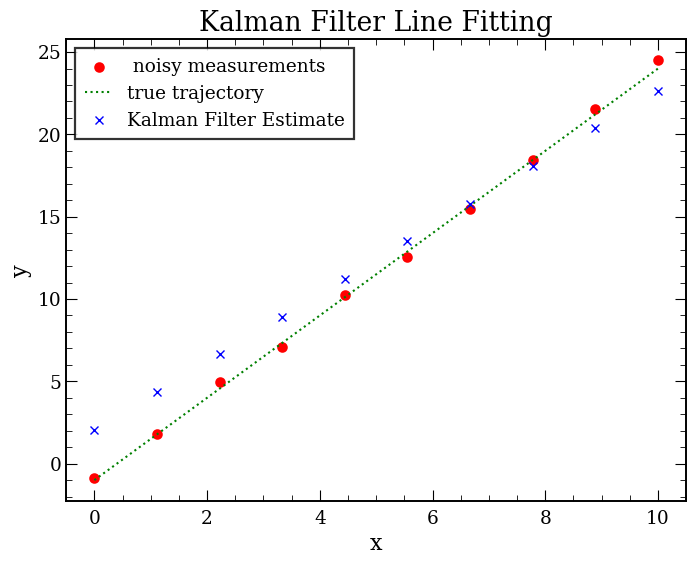

In [17]:
states = np.array([s for x, s in filtered])

filtered_slope = states[-1, 1]
filtered_intercept = states[-1, 0]

plt.scatter(x_vals, y_vals, color='r', label=' noisy measurements')
plt.plot(x_vals, m_true * x_vals + c_true, label='true trajectory', color='g', linestyle=":")
plt.plot(x_vals, filtered_slope * x_vals + filtered_intercept,
         label='Kalman Filter Estimate', linestyle="", marker="x", color='b')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kalman Filter Line Fitting')

plt.show()
